<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-1-Sprint-2-Statistics/blob/master/%20DS-Unit-1-Sprint-2-Statistics/Copy_of_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

In Bayesian statistics, there is a prior probablility assumed, and then it's tested against reality over multiple iterations. It's sensitive to the numer of times that a test is run, and keeps changing over iterations.

In frequentist statistics, the test is run once, and the results are within a predefined range of statistical validity, typically p<.05.


If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
### write a function to see if a drunk driving test is accurate
false_positive_rate = .08
true_positive_rate = 1
prob_drunk_prior = (1/1000)
prob_sober_prior = (1- prob_drunk_prior)


posterior_prob = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior)+(false_positive_rate*prob_sober_prior))

print(posterior_prob)
prob_drunk_prior = posterior_prob

posterior_prob = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior)+(false_positive_rate*prob_sober_prior))
print(posterior_prob)


##What is the probability that a person is drunk after one positive breathalyzer test?
##What is the probability that a person is drunk after two positive breathalyzer tests?
##How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

0.012357884330202669
0.13392032576279944


In [0]:
false_positive_rate = .08
true_positive_rate = 1
prob_drunk_prior = .001
prob_sober_prior = (1- prob_drunk_prior)

def pro_drunk_driving_given_positive(prob_drunk_prior, prob_sober_prior, false_positive_rate, true_positive_rate):
  count = 1
  while count < 10:
    posterior_prob = (true_positive_rate*prob_drunk_prior)/((true_positive_rate*prob_drunk_prior)+(false_positive_rate*prob_sober_prior))
    print("After")
    print(count) 
    print("positive test(s), the likelihood that the testee is drunk is")
    print(posterior_prob)
    print(" --------- ")
    prob_drunk_prior = posterior_prob
    prob_sober_prior = (1- posterior_prob)
    count += 1
  return

pro_drunk_driving_given_positive(prob_drunk_prior, prob_sober_prior, false_positive_rate, true_positive_rate,)

### it takes 4 positive tests to get to p<.05


After
1
positive test(s), the likelihood that the testee is drunk is
0.012357884330202669
 --------- 
After
2
positive test(s), the likelihood that the testee is drunk is
0.13525210993291495
 --------- 
After
3
positive test(s), the likelihood that the testee is drunk is
0.6615996951348605
 --------- 
After
4
positive test(s), the likelihood that the testee is drunk is
0.9606895076105054
 --------- 
After
5
positive test(s), the likelihood that the testee is drunk is
0.9967371577896734
 --------- 
After
6
positive test(s), the likelihood that the testee is drunk is
0.9997381867081508
 --------- 
After
7
positive test(s), the likelihood that the testee is drunk is
0.9999790498904363
 --------- 
After
8
positive test(s), the likelihood that the testee is drunk is
0.9999983239589307
 --------- 
After
9
positive test(s), the likelihood that the testee is drunk is
0.9999998659165077
 --------- 


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

df.head()

##scipy.stats.bayes_mvs()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
age_gains = pd.crosstab(df['age'], df['capital-gain'])

print(age_gains.shape)

print(age_gains)
age_gains.head()
age_gains.describe()
df['capital-gain'].value_counts()



(73, 119)
capital-gain  0      114    401    594    ...  27828  34095  41310  99999
age                                       ...                            
17              385      0      0      3  ...      0      1      0      0
18              533      0      0      7  ...      0      1      0      0
19              699      0      0      4  ...      0      1      0      0
20              737      1      0      4  ...      0      1      0      0
21              700      0      0      2  ...      0      0      0      1
..              ...    ...    ...    ...  ...    ...    ...    ...    ...
85                3      0      0      0  ...      0      0      0      0
86                1      0      0      0  ...      0      0      0      0
87                1      0      0      0  ...      0      0      0      0
88                3      0      0      0  ...      0      0      0      0
90               33      0      1      0  ...      0      0      0      0

[73 rows x 119 columns]


0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [0]:

##.cut
###describe the bins, how many bins

##.qcut
###tell it how many bins
df['age_bins'] = pd.qcut(df['age'], 4, labels=["0-25% youngest","25-50% youngest%","50-75% oldest","75-100% oldest"])

df['age_bins'].head(20)


0        50-75% oldest
1       75-100% oldest
2        50-75% oldest
3       75-100% oldest
4       0-25% youngest
5     25-50% youngest%
6       75-100% oldest
7       75-100% oldest
8     25-50% youngest%
9        50-75% oldest
10    25-50% youngest%
11    25-50% youngest%
12      0-25% youngest
13    25-50% youngest%
14       50-75% oldest
15    25-50% youngest%
16      0-25% youngest
17    25-50% youngest%
18       50-75% oldest
19       50-75% oldest
Name: age_bins, dtype: category
Categories (4, object): [0-25% youngest < 25-50% youngest% < 50-75% oldest < 75-100% oldest]

In [0]:
cut_points = [-1, 1, 1000, 10000, 99998, 1000000000]
bin_names = ["$0-$1", "$1-$1,000", "$1,000-$10,000", "$10,000-$100,000", "$100,000+"]

df['cap_gains_bins'] = pd.cut(df['capital-gain'], cut_points, labels = bin_names)

df['cap_gains_bins'].head(100)


0     $1,000-$10,000
1              $0-$1
2              $0-$1
3              $0-$1
4              $0-$1
           ...      
95             $0-$1
96             $0-$1
97             $0-$1
98             $0-$1
99             $0-$1
Name: cap_gains_bins, Length: 100, dtype: category
Categories (5, object): [$0-$1 < $1-$1,000 < $1,000-$10,000 < $10,000-$100,000 < $100,000+]

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

age_v_money = pd.crosstab(df['cap_gains_bins'], df['age_bins'])

age_v_money


age_bins,0-25% youngest,25-50% youngest%,50-75% oldest,75-100% oldest
cap_gains_bins,,,,
$0-$1,8583,7182,7367,6717
"$1-$1,000",28,3,11,13
"$1,000-$10,000",251,462,588,586
"$10,000-$100,000",29,112,215,255
"$100,000+",7,24,60,68


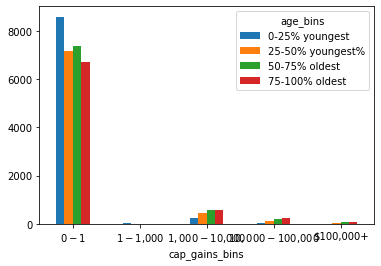

In [0]:
ax = age_v_money.plot.bar(rot = 0)

#visually examing the data


In [0]:
###checking out the chi squared of the table
chi2, p_value, dof, expected_value_table = stats.chi2_contingency(age_v_money)


print(chi2)
print(p_value)
print(dof)
print(expected_value_table)

569.7205864617092
3.078846116406921e-114
12
[[8156.88713492 7134.75529007 7554.60855011 7002.74902491]
 [  15.0299438    13.1465557    13.92018058   12.90331992]
 [ 515.66370812  451.0463745   477.58874113  442.70117625]
 [ 166.96901201  146.04628236  154.64055158  143.34415405]
 [  43.45020116   38.00549737   40.2419766    37.30232487]]


In [0]:

age_frame = df['age']

from scipy import stats

mean, var, std = stats.bayes_mvs(df['age'])

print(mean)
print(var)
print(std)

age_frame.shape
#ax=age_frame.plot.bar(rot=0);


Mean(statistic=38.58164675532078, minmax=(38.45730990459461, 38.705983606046956))
Variance(statistic=186.05568600783081, minmax=(183.65720472095407, 188.45416729470756))
Std_dev(statistic=13.640223092304275, minmax=(13.552303662004416, 13.728142522604134))


(32561,)

In [0]:
len(age_frame)

32561

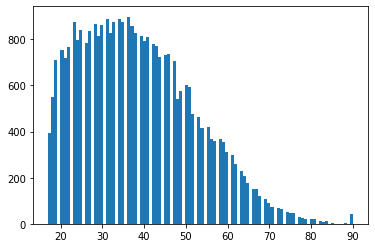

In [0]:
ax = plt.hist(age_frame, bins=100)


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!